In [3]:
import numpy as np
import nnfs 
nnfs.init()

# Section 1

## Without numpy

### A single neuron 

#### Initialize

In [4]:
#Let's initialize for one input
inputs = [1, 2, 3]
weights = [0.2 ,0.8, -0.5]
bias = 2

#### Get the outputs

 - What we want is to multiply each corresponding input by each weights and then add the bias to it. Let's first do it by hand and crate a reusable function


In [5]:
output = (inputs[0] * weights[0] + 
          inputs[1] * weights[1] + 
          inputs[2] * weights[2] +
          bias )
print(output)

2.3


In [6]:
#create a reusable output function 
def out(inputs, weights, bias):
    sum = bias
    for i in range(len(inputs)):
        sum += weights[i] * inputs[i]
    return sum

In [7]:
out(inputs, weights, bias)

2.3000000000000003

In [8]:
# add another input and weight and check results
inputs.append(2.5)
weights.append(1)
out(inputs, weights, bias)

4.800000000000001

### A layer of neurons

#### Initialize

In [9]:
#Let's add two more neurons two the currently available neuron
weights1 = weights
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = bias
bias2 = 3
bias3 = 0.5

#### Get the outputs

In [10]:
#Let's do it by hand first
outputs = [
    inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
    inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
    inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3,
    ]
outputs

[4.8, 1.21, 2.385]

#### Nesting the weights and biases

As doing this by hand get's very long let's list the weights and biases together for the whole layer

In [11]:
weights = [weights1,
           weights2,
           weights3]
biases = [bias1, bias2, bias3]
print(*weights, biases, sep='\n')

[0.2, 0.8, -0.5, 1]
[0.5, -0.91, 0.26, -0.5]
[-0.26, -0.27, 0.17, 0.87]
[2, 3, 0.5]


#### Creating a loop to do the whole sum in one go

In [12]:
def layer_sum(inputs, weights, biases):
    layer_outputs = []

    #Go through each neuron
    for neuron_weights, neuron_bias in zip(weights,biases):
        neuron_sum = 0

        #go through each input and corresponding weight
        for weight, input in zip(neuron_weights, inputs):
            neuron_sum += weight * input

        neuron_sum += neuron_bias
        #you can replace the whole inner loop and sums with the function we created earlier `out()`

        layer_outputs.append(neuron_sum)
    
    return layer_outputs

layer_sum(inputs,weights,biases)

[4.8, 1.21, 2.385]

## With numpy

- Let's implement the above steps with numpy and see the ease of use

### A single neuron

#### Initialize

In [13]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias  = 2.0

#### Output using `np.dot()`

In [14]:
np.dot(np.array(inputs), np.array(weights)) + np.array(bias)

4.799999952316284

### A layer of neurons

#### Initialize as before

In [15]:
inputs = inputs
weights = [[ 0.2 , 0.8 , -0.5 , 1 ],
           [ 0.5 , -0.91 , 0.26 , -0.5 ],
           [ -0.26 , -0.27 , 0.17 , 0.87 ]]
biases = [2.0, 3.0, 0.5]

#### Get the output

In [16]:
layer_outputs = np.dot(np.array(weights), np.array(inputs)) + biases
layer_outputs

array([4.79999995, 1.21000004, 2.38499999])

### Adding the batch dimension

- Before we only looked at one sample of data but usually in any Dense layer the input samples are presented as batches for parallel processing so in this case the theorem is mostly similar but the code is slightly adjusted to fit for this need and the outputs also have a batch dimension.

#### Initialize

In [17]:
inputs = [[ 1.0 , 2.0 , 3.0 , 2.5 ],
[ 2.0 , 5.0 , - 1.0 , 2.0 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]]
weights = [[ 0.2 , 0.8 , - 0.5 , 1.0 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2.0 , 3.0 , 0.5 ]

#### Get outputs

In [18]:
layer_outputs = np.dot(np.array(inputs), np.array(weights).T) + np.array(biases)
layer_outputs

array([[ 4.79999995,  1.21000004,  2.38499999],
       [ 8.9000001 , -1.80999994,  0.19999999],
       [ 1.41000003,  1.051     ,  0.02599999]])

### Adding another layer

#### Initialize the weights and biases
- the number of weights per neuron must match the number of outputs from the last layer

In [19]:
weights2 = [[ 0.1 , - 0.14 , 0.5 ],
[ - 0.5 , 0.12 , - 0.33 ],
[ - 0.44 , 0.73 , - 0.13 ]]
biases2 = [ - 1 , 2 , - 0.5 ]

#### Pass the inputs through both layers

In [20]:
layer1_outputs = np.dot(np.array(inputs), np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs

array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.99314   ,  1.41254002, -0.35655001]])

# Training data

In [21]:
import nnfs

nnfs.init()

In [22]:
from nnfs.datasets import spiral_data

In [23]:
X, y = spiral_data(samples=100, classes=3)

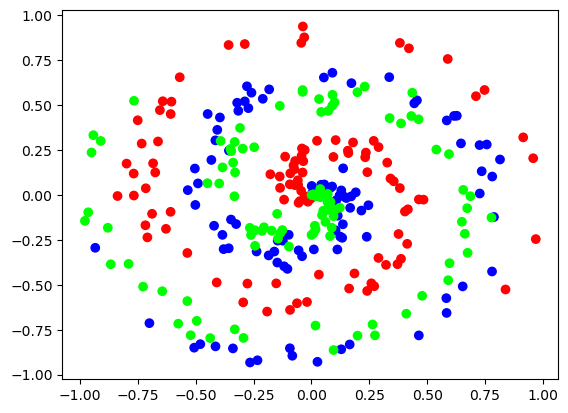

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.brg)

# Creating reusable `Dense_Layer` class

In [25]:
class Dense_Layer():

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

<a id='code_1'></a>

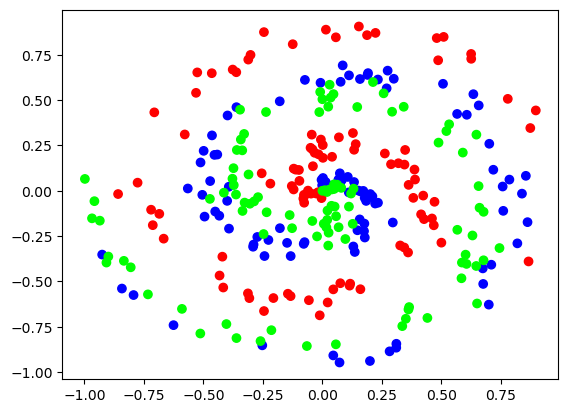

Forwarding through layer 1
Success
Shape of output : (300, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


In [26]:
# Check the outputs from this function
X , y = spiral_data(100, 3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.brg)
plt.show()

layer1 = Dense_Layer(2,3)
print('Forwarding through layer 1')
layer1.forward(X) #X has two inputs
print('Success')

output_layer1 = layer1.output
print('Shape of output :', output_layer1.shape)
print(output_layer1[:5])

# Activation Functions

## Showing the importance of non-linear activation functions
- to show the importance of non-linearity lets create a linear regression model using tensorflow and try to fit the sine function

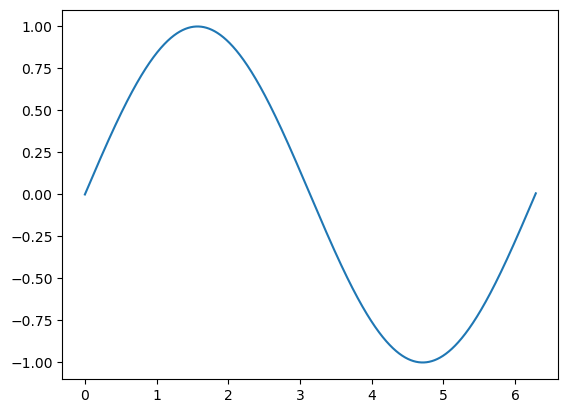

In [27]:
#Create the dataset

x_sin = np.linspace(0,6.29, 10000)
y_sin = np.sin(x_sin)
plt.plot(x_sin, y_sin)


In [28]:
# Create the model creator function 
def create_anc_compile(relu=False):
    act = 'relu' if relu else 'linear'
    import tensorflow as tf
    import keras
    model = keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(8, activation=act),
        tf.keras.layers.Dense(8, activation=act),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    model.fit(x_sin, y_sin, shuffle=False, epochs=120, verbose=0)
    preds = model.predict(x_sin)
    plt.figure(figsize=(5,3))
    plt.title(f'Using {act} activation')
    plt.plot(x_sin, y_sin, c='g', label= 'truth')
    plt.plot(x_sin, preds, c='r', label='prediction')
    plt.legend()
    plt.show()

### Linear

313/313 [==============================] - 0s 935us/step


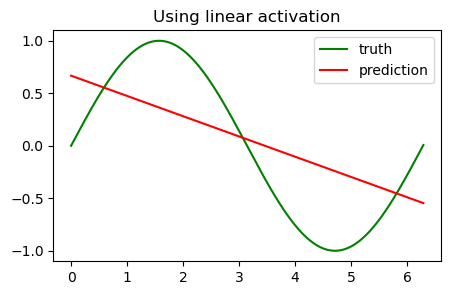

In [29]:
create_anc_compile()

### Non-linear

313/313 [==============================] - 0s 856us/step


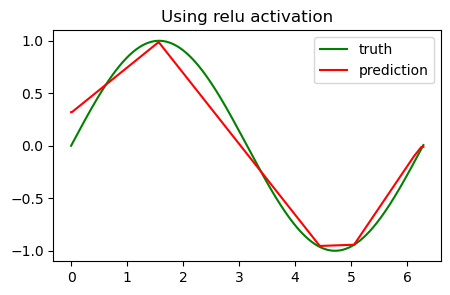

In [30]:
create_anc_compile(True)


 ---
 > # Extremely important
 > 
 > [Watch this video](https://youtu.be/gmjzbpSVY1A?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&t=562)
 >
 ---

## ReLU activation

In [31]:
inp_rel = list(range(-10,10))
out_rel = []
inp_rel

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
for i in inp_rel:
    out_rel.append(max(0,i))
inp_rel, out_rel

([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
### We can use numpy easily
out_rel_np = np.maximum(0,inp_rel)
inp_rel, out_rel_np

([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

## Creating ReLU class

In [34]:
class ReLU_Activation():

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

### Using this relu class on previous outputs

> Continuation from [code 1](#code_1)

In [35]:
activation_1 = ReLU_Activation()
activation_1.forward(output_layer1)
output_activation1 = activation_1.output
print('Before Activation')
print(output_layer1[:5])
print('After activation')
print(output_activation1[:5])


Before Activation
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]
After activation
[[0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [2.992573e-06 0.000000e+00 0.000000e+00]
 [8.951018e-05 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]


## Softmax activation

In [36]:
E = np.e
def softmax(outputs):
    t1 = [E ** x for x in outputs]
    sm = sum(t1)
    return [i/sm for i in t1]

In [37]:
tmp = [ 4.8 , 1.21 , 2.385 ]
tmp2 = softmax(tmp)
print(tmp2)
print(sum(tmp2))

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [38]:
# Using numpy
tmp = np.array([[ 4.8 , 1.21 , 2.385 ],
[ 8.9 , - 1.81 , 0.2 ],
[ 1.41 , 1.051 , 0.026 ]])
np.exp(tmp)/np.sum(np.exp(tmp), axis=-1, keepdims=True)

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

## Creating Softmax class

In [39]:
class Softmax_Activation():

    def forward(self, inputs):
        exps = np.exp(inputs-np.max(inputs, axis=-1, keepdims=True))
        self.output = exps/ np.sum(exps, axis=-1, keepdims=True)

# Using all we built together
<a id='code_2'></a>

### Data

#### Create the data

In [40]:
# Create the data
X,y  = spiral_data(samples=100, classes=3)

#### Visualize the data

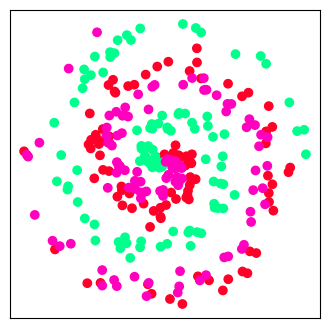

In [41]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.gist_rainbow)
plt.xticks([])
plt.yticks([])
plt.show()

### Modelling

#### Create the model

In [42]:
#layer 1
dense_1 = Dense_Layer(2, 3)

#activation 1
activation_1 = ReLU_Activation()

#layer 2 
dense_2 = Dense_Layer(n_inputs=3, n_neurons=3)

#activation 2 
activation_2 = Softmax_Activation()

#### Forward pass through the model

In [43]:
dense_1.forward(X)
layer_1_outputs = dense_1.output
activation_1.forward(layer_1_outputs)
activation_1_outputs = activation_1.output
dense_2.forward(activation_1_outputs)
layer_2_outputs = dense_2.output
activation_2.forward(layer_2_outputs)
activation_2_outputs = activation_2.output


In [44]:
activation_2_outputs[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333418, 0.33333272, 0.33333308],
       [0.3333347 , 0.33333236, 0.33333296],
       [0.33333558, 0.33333167, 0.33333272],
       [0.3333367 , 0.3333308 , 0.3333324 ]], dtype=float32)

# Loss Functions

## Categorical Cross-Entropy Loss

### Pure python code

In [45]:
# Value of Eular's number
import math
E = math.e
E

2.718281828459045

In [46]:
loss = [-math.log(probs[y[i]])for i,probs in enumerate(activation_2_outputs)]
loss[:5]

[1.0986122588657878,
 1.0986097554739154,
 1.098608146153878,
 1.0986055533659322,
 1.0986021559298342]

### Using numpy

In [47]:
loss_singular = -np.log(activation_2_outputs[range(len(activation_2_outputs)),list(y)])
np.mean(loss_singular)

1.0986176

In [48]:
#to prevent edge errors of log we will clip both ends of the predictions
#np.clip(activation_2_outputs, 1e-7, 1-1e-7)

### Creating a Class for Categorical Crossentropy

In [49]:
# As we will create more loss functions let's make a common Loss class
class Loss():

    def calculate(self, preds, y):

        losses = self.forward(preds, y)

        return np.mean(losses)

In [50]:
#inherit from loss class
class CategoricalCrossentropy(Loss):

    def forward(self, preds, truth):

        n_samples = len(truth)

        clipped_preds = np.clip(preds, 1e-7, 1-1e-7)
        
        #if sparsely encoded
        if len(truth.shape) == 1:
            confidences = clipped_preds[range(n_samples), truth]
        
        #if one_hot encoded
        elif len(y.shape) == 2:
            confidences = np.sum(clipped_preds * truth, axis=1)
            
        return -np.log(confidences)

> Continuation from [Using all we built together](#code_2)

In [51]:
loss_fn1 = CategoricalCrossentropy()
loss_model_1 = loss_fn1.calculate(activation_2_outputs, y)

In [52]:
loss_model_1

1.0986176

### Accuracy

In [93]:
def accuracy(preds, truth):
    # handling one_hot
    if truth.ndim == 2:
        truth = np.argmax(truth, axis=1)
    preds = np.argmax(preds, axis=1)
    return np.mean(preds==truth)

In [54]:
accuracy(activation_2_outputs, y)

0.3333333333333333

# Optimization

## Random initialization

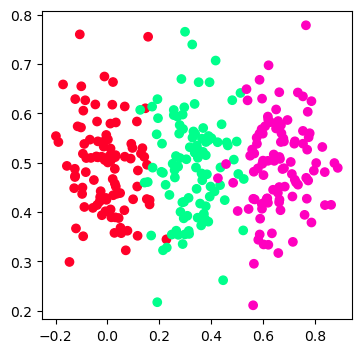

In [109]:
# Let's create a more simple dataset
from nnfs.datasets import vertical_data

X, y = vertical_data(samples=100, classes=3)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.gist_rainbow)
plt.xticks()
plt.yticks()
plt.show()

In [110]:
epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights = 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases = 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights = 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases = 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.0988689661026
 accuracy : 0.3333333333333333

epoch : 5/10000
---------------------------------------------------
Loss has decreased from 1.0988689661026 to 1.0985347032546997
 accuracy : 0.3333333333333333

epoch : 61/10000
---------------------------------------------------
Loss has decreased from 1.0985347032546997 to 1.0984342098236084
 accuracy : 0.3333333333333333

epoch : 69/10000
---------------------------------------------------
Loss has decreased from 1.0984342098236084 to 1.0967214107513428
 accuracy : 0.3333333333333333

epoch : 333/10000
---------------------------------------------------
Loss has decreased from 1.0967214107513428 to 1.096471905708313
 accuracy : 0.3333333333333333

epoch : 1646/10000
---------------------------------------------------
Loss has decreased from 1.096471905708313 to 1.095818042755127
 accuracy : 0.43

epoch : 5839/10000
--------------------

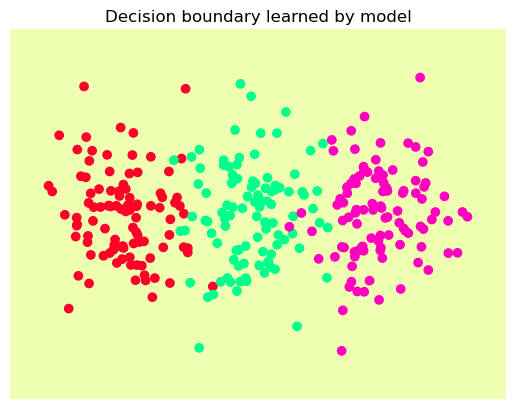

In [111]:
def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

## Random adjustment
- Code is same as Random initialization but instead of initializing every time we add to current weights and restore best weights if loss does not reduce

In [ ]:
epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights += 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases += 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights += 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases += 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    else:
        dense_1.weights = dense_1_weights.copy()
        dense_1.biases = dense_1_biases.copy()
        dense_2.weights = dense_2_weights.copy()
        dense_2.biases = dense_2_biases.copy()

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.0993525981903076
 accuracy : 0.3333333333333333

epoch : 13/10000
---------------------------------------------------
Loss has decreased from 1.0993525981903076 to 1.0990726947784424
 accuracy : 0.3333333333333333

epoch : 17/10000
---------------------------------------------------
Loss has decreased from 1.0990726947784424 to 1.098777413368225
 accuracy : 0.3333333333333333

epoch : 20/10000
---------------------------------------------------
Loss has decreased from 1.098777413368225 to 1.0979863405227661
 accuracy : 0.3333333333333333

epoch : 25/10000
---------------------------------------------------
Loss has decreased from 1.0979863405227661 to 1.0973131656646729
 accuracy : 0.3333333333333333

epoch : 27/10000
---------------------------------------------------
Loss has decreased from 1.0973131656646729 to 1.0944374799728394
 accuracy : 0.3333333333333333

epoch : 34/10000
---

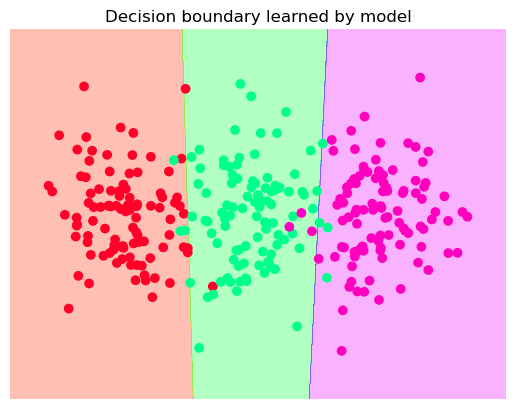

In [113]:
def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

### Trying this with spiral data

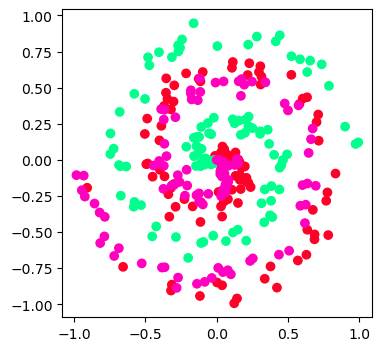

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.0987178087234497
 accuracy : 0.3333333333333333

epoch : 18/10000
---------------------------------------------------
Loss has decreased from 1.0987178087234497 to 1.0984671115875244
 accuracy : 0.3333333333333333

epoch : 19/10000
---------------------------------------------------
Loss has decreased from 1.0984671115875244 to 1.0978389978408813
 accuracy : 0.3333333333333333

epoch : 22/10000
---------------------------------------------------
Loss has decreased from 1.0978389978408813 to 1.097572684288025
 accuracy : 0.3333333333333333

epoch : 23/10000
---------------------------------------------------
Loss has decreased from 1.097572684288025 to 1.0972646474838257
 accuracy : 0.3333333333333333

epoch : 31/10000
---------------------------------------------------
Loss has decreased from 1.0972646474838257 to 1.0971142053604126
 accuracy : 0.3233333333333333

epoch : 37/10000
---

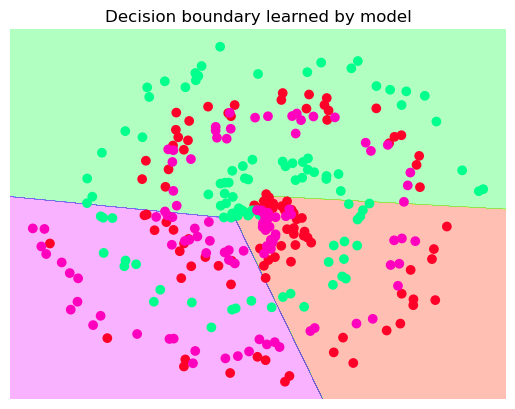

In [120]:
X, y = spiral_data(samples=100, classes=3)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.gist_rainbow)
plt.xticks()
plt.yticks()
plt.show()

epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights += 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases += 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights += 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases += 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    else:
        dense_1.weights = dense_1_weights.copy()
        dense_1.biases = dense_1_biases.copy()
        dense_2.weights = dense_2_weights.copy()
        dense_2.biases = dense_2_biases.copy()

def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

# Optimizing Using gradients
- Instead of randdomly adjusting let's adjust the parameters using the gradients of each parameter relative to the loss so we can get the loss function as close to a minimum as possible

## FIrst layer

Let's calculate the gradients of the first layer only 
- In this situation we have 4 inputs and 3 neurons so the weights are an array of shape (4,3) transposed

In [121]:
# Let's assume the gradients received from th nexxt layer to this 3 neurons is a vector of 1s
dvalues = np.ones(shape=(1,3))
dvalues

array([[1., 1., 1.]])

In [ ]:
weights = np.array(
    object=[[ 0.2 , 0.8 , - 0.5 , 1 ],
            [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
            [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
).T